<a href="https://colab.research.google.com/github/heejin-02/computer_vision/blob/main/ex02_MLP%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
mnist_train=dset.MNIST("",train=True,transform=transforms.ToTensor(),
                       target_transform=None,download=True)
mnist_test=dset.MNIST("",train=False,transform=transforms.ToTensor(),
                      target_transform=None,download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17269268.14it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1615638.05it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3932155.83it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2562966.33it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label: 5


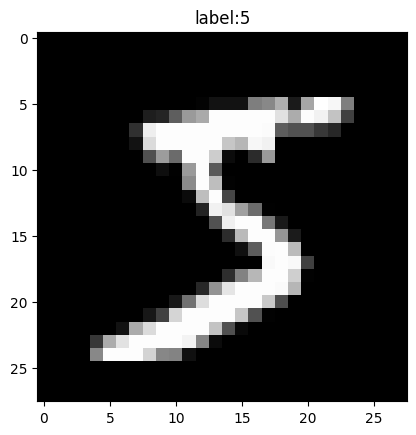

In [4]:
print("mnist_train 길이:",len(mnist_train))
print("mnist_test 길이:",len(mnist_test))

#데이터 하나 형태
image,label = mnist_train.__getitem__(0)
print("image data 형태:",image.size())
print("label:",label)

#그리기
img = image.numpy() #image타입을 numpy로 변환(1,28,28)
plt.title("label:%d" %label)
plt.imshow(img[0],cmap='gray')
plt.show()

In [5]:
batch_size = 1024
learning_rate=0.01
num_epoch=400

In [6]:
train_loader = torch.utils.data.DataLoader(mnist_train,
                                           batch_size =batch_size,
                                           shuffle=True, num_workers=2,
                                           drop_last=True)
test_loader= torch.utils.data.DataLoader(mnist_test,batch_size=batch_size,
                                         shuffle=False,num_workers=2,
                                         drop_last=True)

[0]
한 번에 로드되는 데이터 크기: 1024


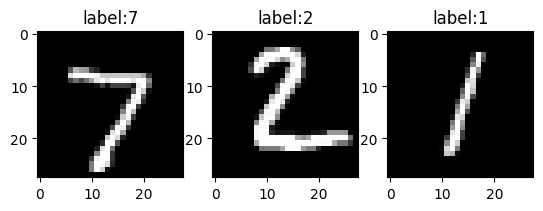

[1]
한 번에 로드되는 데이터 크기: 1024


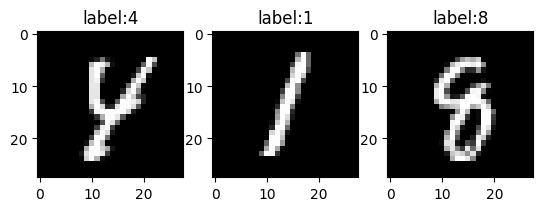

[2]
한 번에 로드되는 데이터 크기: 1024


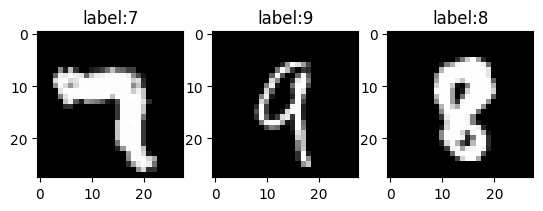

[3]
한 번에 로드되는 데이터 크기: 1024


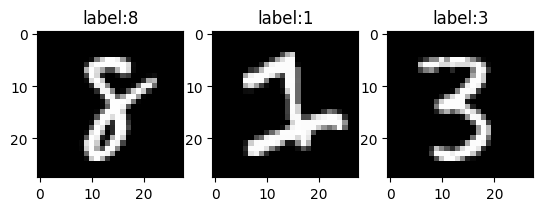

[4]
한 번에 로드되는 데이터 크기: 1024


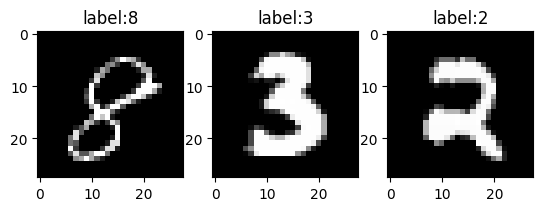

[5]
한 번에 로드되는 데이터 크기: 1024


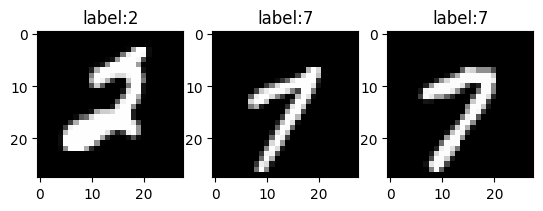

In [9]:
n=3
for i, [imgs,labels] in enumerate(test_loader):
  if i>5:
      break

  print("[%d]" %i)
  print("한 번에 로드되는 데이터 크기:",len(imgs))

    #그리기
  for j in range(n):
    img = imgs[j].numpy()
    img = img.reshape((img.shape[1], img.shape[2]))

    plt.subplot(1,n,j+1)
    plt.imshow(img,cmap='gray')
    plt.title("label:%d" %labels[j])
  plt.show()

In [10]:
#모델 선언
#퍼셉트론(2 hidden layer) *
model = nn.Sequential(
    nn.Linear(28*28,256),
    nn.Sigmoid(),
    nn.Linear(256,128),
    nn.Linear(128,10),
)
#파라미터 보기
#print(list(mdel.parameters()))

In [ ]:
#model = model.cuda()

In [12]:
def ComputeAccr(dloader,imodel):
  correct = 0
  total = 0

  for j, [imgs,labels] in enumerate(dloader):
    img = imgs # x
    label = Variable(labels)
    #label = Variable(labels).cuda()
    #.cuda() : GPU에 로드되기 위함. 만약 CPU로 설정되어 있다면 에러남

    #(batch_size 1,28,28) -> (batch_size, 28,28)
    img = img.reshape((img.shape[0],img.shape[2],img.shape[3]))
    #(batch_size,28,28) -> (batch_size, 28*28)
    img = img.reshape((img.shape[0], img.shape[1]*img.shape[2]))
    img = Variable(img, requires_grad=False)
    #img = Variable(img,requires_grad=False).cuda()

    output = imodel(img)
    _, output_index = torch.max(output,1)

    total += label.size(0)
    correct += (output_index == label).sum().float()
  print("Accuracy of Test Data:{}".format(100*correct/total))

In [13]:
ComputeAccr(test_loader,model)

Accuracy of Test Data:10.08029556274414


In [14]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=learning_rate)

In [15]:
num_epoch=400
for i in range(num_epoch):
  for j, [imgs, labels] in enumerate(train_loader):
    img = imgs
    label = Variable(labels)
    #label = Variable(labels).cuda() #batch_size

    #(batch_size 1,28,28) -> (batch_size 28, 28)
    img = img.reshape((img.shape[0], img.shape[2],img.shape[3]))
    #(batch_size, 28, 28) -> (batch_size 28*28)
    img = img.reshape((img.shape[0], img.shape[1]*img.shape[2]))
    img = Variable(img, requires_grad=True)
    #img = Variable(img,requires_grad=True).cuda()

    optimizer.zero_grad()
    output = model(img)
    loss = loss_func(output,label)

    loss.backward()
    optimizer.step()

  if i%50==0:
    print("%d.." %i)
    ComputeAccr(test_loader,model)
    print(loss)

0..
Accuracy of Test Data:11.295573234558105
tensor(2.2922, grad_fn=<NllLossBackward0>)
50..
Accuracy of Test Data:81.41275787353516
tensor(0.6675, grad_fn=<NllLossBackward0>)
100..
Accuracy of Test Data:88.05338287353516
tensor(0.4270, grad_fn=<NllLossBackward0>)
150..
Accuracy of Test Data:89.77864837646484
tensor(0.3772, grad_fn=<NllLossBackward0>)
200..
Accuracy of Test Data:90.64669799804688
tensor(0.3383, grad_fn=<NllLossBackward0>)
250..
Accuracy of Test Data:91.20008850097656
tensor(0.3657, grad_fn=<NllLossBackward0>)
300..
Accuracy of Test Data:91.52560424804688
tensor(0.3329, grad_fn=<NllLossBackward0>)
350..
Accuracy of Test Data:91.81857299804688
tensor(0.3396, grad_fn=<NllLossBackward0>)


In [16]:
ComputeAccr(test_loader,model)

Accuracy of Test Data:92.04644012451172


In [18]:
netname = './nets/mlp_weight.pkl'
torch.save(model,netname, )

#model = torch.load(netname)